In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks")

In [4]:
train_file = "data/train.csv"

In [123]:
df = pd.read_csv(train_file, sep=',')

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


### Work with NaN values

In [125]:
cols_NaN_to_mode = ["HomePlanet", "CryoSleep", "Cabin", "Destination", "VIP"]
for col in cols_NaN_to_mode:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [128]:
cols_NaN_to_mean = ["Age"]
for col in cols_NaN_to_mean:
    df[col].fillna(df[col].mean(), inplace=True)

In [136]:
cols_NaN_to_zero = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
for col in cols_NaN_to_zero:
    df[col].fillna(0, inplace=True)

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   bool   
 3   Cabin         8693 non-null   object 
 4   Destination   8693 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   bool   
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(3), float64(6), object(5)
memory usage: 772.6+ KB


In [139]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


### Split Cabin feature to Deck, Num and Side

In [140]:
df_cabin = df["Cabin"].str.split("/", expand=True)
df["Cabin_Deck"], df["Cabin_Num"], df["Cabin_Side"]  = df_cabin[0], df_cabin[1], df_cabin[2]
df.drop(columns=['Cabin'], inplace=True)

In [198]:
df = df.astype({"CryoSleep": "int","VIP": "int", "Transported": "int", "Cabin_Num": "int"})

In [145]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_Deck,Cabin_Num,Cabin_Side,FirstName,SecondName
0,0001_01,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,B,0,P,Maham,Ofracculy
1,0002_01,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1,F,0,S,Juanna,Vines
2,0003_01,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,A,0,S,Altark,Susent
3,0003_02,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,A,0,S,Solam,Susent
4,0004_01,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1,F,1,S,Willy,Santantines


### Let's see to unique values of categorical features

In [146]:
cat_features = ['HomePlanet', 'Destination', 'FirstName', 'SecondName', 
                'Cabin_Deck', 'Cabin_Num', 'Cabin_Side', "VIP", "CryoSleep"]
num_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [147]:
for feature in cat_features:
    print(f"{feature}: {df[feature].unique()}")

HomePlanet: ['Europa' 'Earth' 'Mars']
Destination: ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e']
FirstName: ['Maham' 'Juanna' 'Altark' ... 'Ants' 'Gian' 'Chain']
SecondName: ['Ofracculy' 'Vines' 'Susent' ... 'Fort' 'Workmanson' 'Sionerorly']
Cabin_Deck: ['B' 'F' 'A' 'G' 'E' 'D' 'C' 'T']
Cabin_Num: ['0' '1' '2' ... '1892' '1893' '1894']
Cabin_Side: ['P' 'S']
VIP: [0 1]
CryoSleep: [0 1]


### Is dataset imbalance?

In [221]:
np.unique(df["Transported"].to_numpy(), return_counts=True)

(array([0, 1]), array([4315, 4378]))

### Let's see on statictics of numerical features

In [149]:
df[num_features].describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.827930,220.009318,448.434027,169.572300,304.588865,298.261820
std,14.339054,660.519050,1595.790627,598.007164,1125.562559,1134.126417
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,41.000000,61.000000,22.000000,53.000000,40.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


### Let's plot some distribution graphs

<AxesSubplot:xlabel='VRDeck', ylabel='Count'>

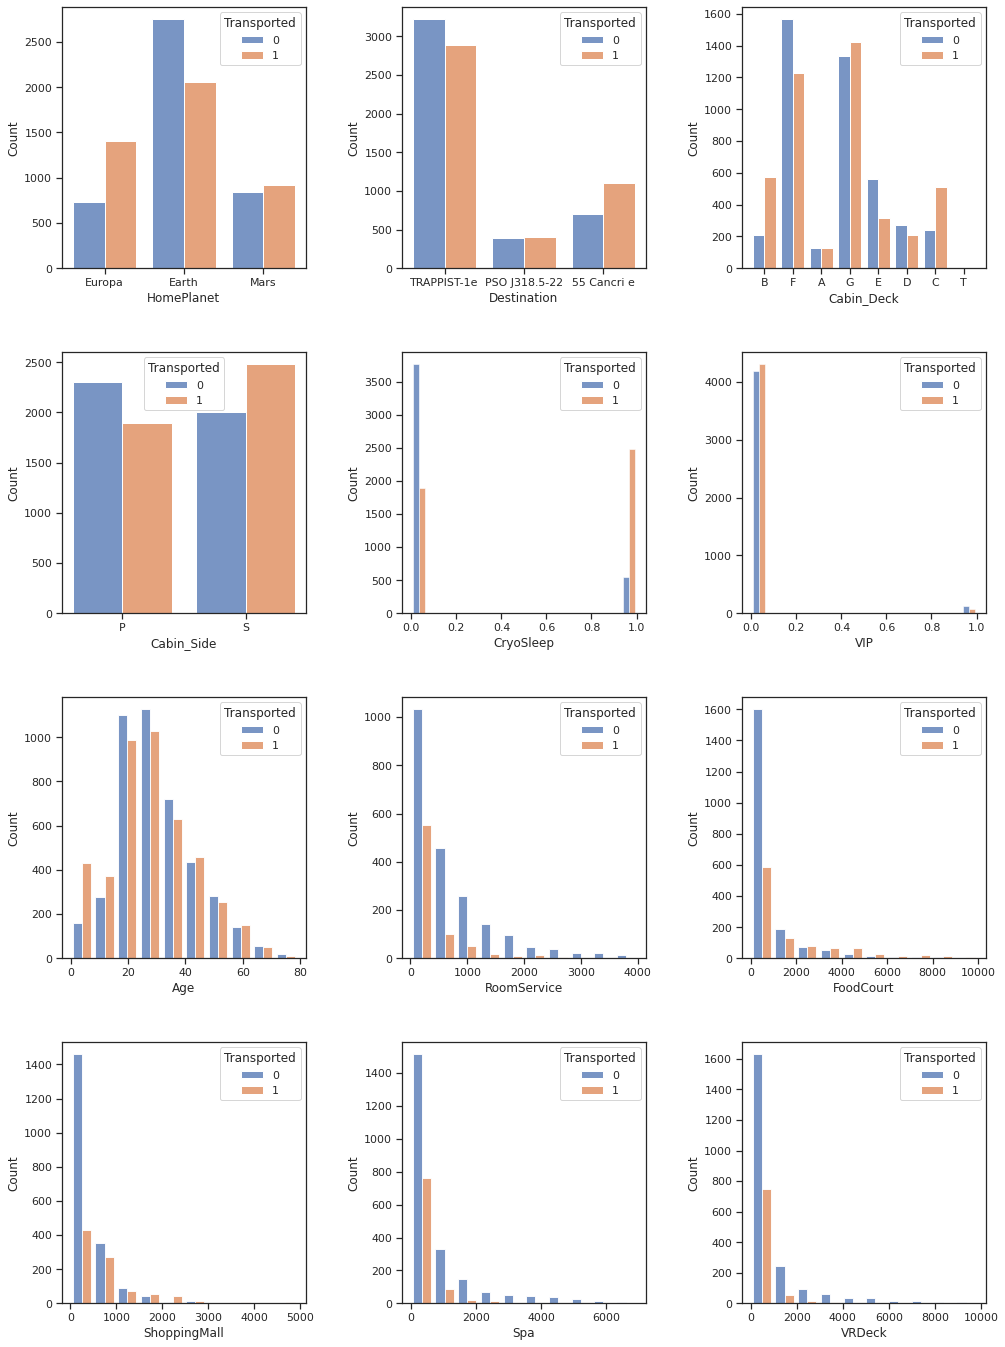

In [195]:
fig, axs = plt.subplots(4,3,figsize=(15,20))
fig.tight_layout(pad=5.0)
sns.histplot(data=df, x="HomePlanet", hue="Transported", multiple="dodge", shrink=.8, ax=axs[0,0])
sns.histplot(data=df, x="Destination", hue="Transported", multiple="dodge", shrink=.8, ax=axs[0,1])
sns.histplot(data=df, x="Cabin_Deck", hue="Transported", multiple="dodge", shrink=.8, ax=axs[0,2])
sns.histplot(data=df, x="Cabin_Side", hue="Transported", multiple="dodge", shrink=.8, ax=axs[1,0])
sns.histplot(data=df, x="CryoSleep", hue="Transported", multiple="dodge", shrink=.8, ax=axs[1,1])
sns.histplot(data=df, x="VIP", hue="Transported", multiple="dodge", shrink=.8, ax=axs[1,2])
sns.histplot(data=df, x="Age", hue="Transported", bins=10, multiple="dodge", shrink=.8, ax=axs[2,0])
sns.histplot(data=df.query("RoomService>0 and RoomService<4000"), x="RoomService", 
             hue="Transported", bins=10, multiple="dodge", shrink=.8, ax=axs[2,1])
sns.histplot(data=df.query("FoodCourt>0 and FoodCourt<10000"), x="FoodCourt", 
             hue="Transported", bins=10, multiple="dodge", shrink=.8, ax=axs[2,2])
sns.histplot(data=df.query("ShoppingMall>0 and ShoppingMall<5000"), x="ShoppingMall", 
             hue="Transported", bins=10, multiple="dodge", shrink=.8, ax=axs[3,0])
sns.histplot(data=df.query("Spa>0 and Spa<7000"), x="Spa", 
             hue="Transported", bins=10, multiple="dodge", shrink=.8, ax=axs[3,1])
sns.histplot(data=df.query("VRDeck>0 and VRDeck<10000"), x="VRDeck", 
             hue="Transported", bins=10, multiple="dodge", shrink=.8, ax=axs[3,2])

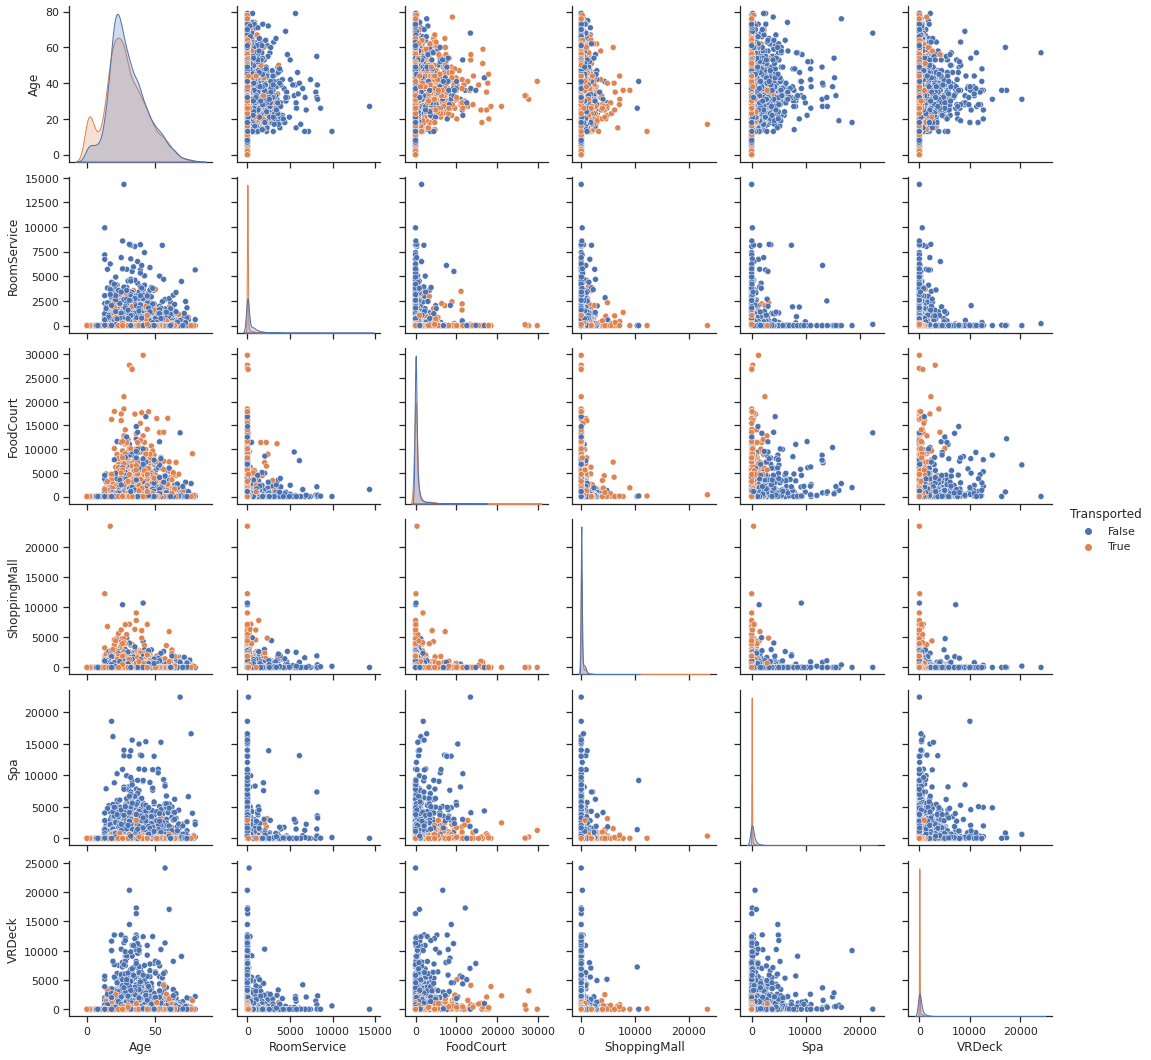

In [90]:
sns.pairplot(data=df[num_features + ['Transported']], hue="Transported")

### Conclusion

1. Target (Transported) does not depend on feature VIP
2. Most of those who paid for luxury amenities didn't Transported (Transported=False)
3. There are no explicit (visible) correlations between numerical features
4. There is an "anomaly" in the age distribution. Children was Transported more often